# Trabajo Práctico Semanal 6
Teoria de circuitos II

### Sandomir L Uriel

Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
<br>
<img src="https://i.gyazo.com/a576ddc3fc7fee14163fc8905ecc969b.png"/>

Para obtener la transferencia deseada, haremos un breve analisis sobre lo que podemos observar en las respuestas de modulo y fase del modelo Pasa-Bajos:

Vemos que es un Filtro Notch Pasa-Bajos, con ceros en $\omega_z = 3$, frecuencia de corte en la banda de paso de $\omega_0 = 1$ y vemos que despues de los ceros, vemos una caida de 20dB/dec, por lo que podemos ubicar un polo real sobre la circunferencia de radio unitario.

Tenemos entonces 3 polos sobre $\omega_0$, por lo que estaran espaciados $\frac{\pi}{3}$ entre ellos.

La transferencia nos queda por ahora de la siguiente manera:
<br>$T_L = H . \frac{1}{s + 1} . \frac{s^2 + K^2.\omega_z^2}{s^2 + s + 1}$ 
<br>
Para que haya 0dB en la banda de paso: $K^2 = 1$ y $H = \frac{1}{9}$
<br>
Finalmente conseguimos una funcion transferencia:
<br>$T_L = \frac{1}{9} . \frac{s^2 + 9}{(s + 1)(s^2 + s + 1)} = \frac{1}{9} . \frac{s^2 + 9}{s^3 + 2.s^2 + 2.s + 1}$ 
<br><br>
Ademas, podemos ver que al tener un desfasaje de $\frac{\pi}{3}$ entre los polos, tenemos un Q unitario.

<IPython.core.display.Math object>

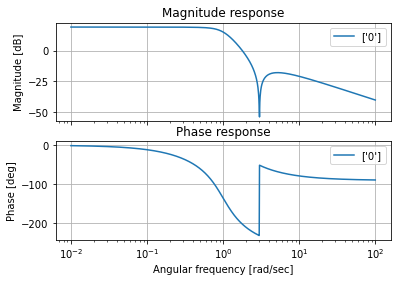

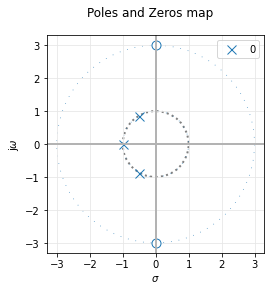

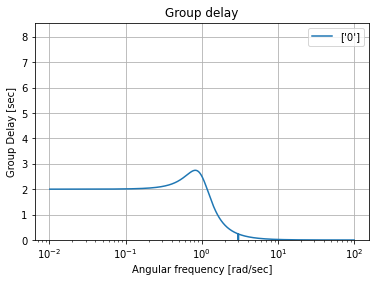

In [16]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt

w0 = 1
wz = 3

print("Verificacion numerica - Funcion Pasa-Bajos")

num_lp = np.array([1, 0, wz**2])
den_lp = np.array([1, 2, 2, 1])

lowpass = sig.TransferFunction(num_lp,den_lp)
tc2.pretty_print_lti(num_lp,den_lp)
tc2.analyze_sys(lowpass)

Ahora queres obtener un filtro Pasa-Altos de nuestro modelo Pasa-Bajos, por lo que aplicamos el nucleo de transformacion LP-HP:
<br>
$T_H = \frac{1}{9} . \frac{\frac{1}{s^2} + 9}{\frac{1}{s^3} + 2.\frac{1}{s^2} + 2.\frac{1}{s} + 1}$
<br><br>
$T_H = \frac{1}{9} . \frac{s + 9 . s^3}{s^3 + 2.s^2 + 2.s + 1}$
<br><br>Acomodando:<br>
$T_H = \frac{s(s^2 + \frac{1}{9})}{s^3 + 2.s^2 + 2.s + 1}$

Verificacion numerica - Funcion Pasa-Altos


<IPython.core.display.Math object>

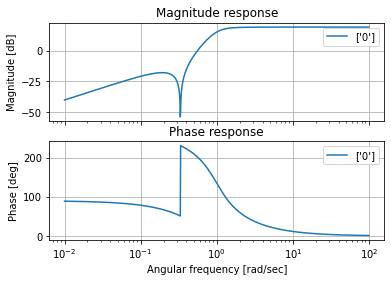

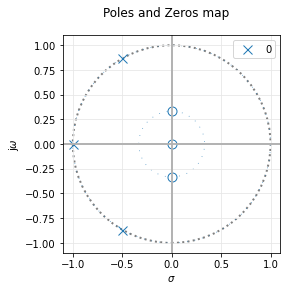

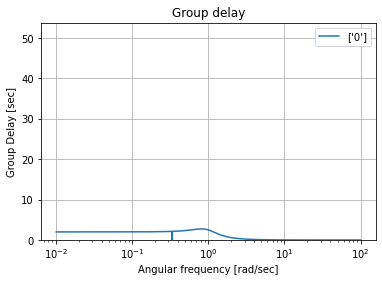

In [21]:
print("Verificacion numerica - Funcion Pasa-Altos")

num_hp, den_hp = sig.lp2hp(num_lp, den_lp)

highpass = sig.TransferFunction(num_hp,den_hp)
tc2.pretty_print_lti(num_hp,den_hp)
tc2.analyze_sys(highpass)

#### Implementacion:

Se solicita realizar la implementacion utilizando la segunda estructura para la etapa de 2do orden:
<br>
<img src="https://i.gyazo.com/3cc27d0eedd5ebf5824760ef304a38ca.png"/>
<br><br>
##### Analisis:
<br>
<img src="https://i.gyazo.com/e53c6c09bdfb74853d961606463b8cf4.png"/>
<br>
<img src="https://i.gyazo.com/66fa9cc3e770f943ebbec72f0d09494f.png"/>
<br>
<img src="https://i.gyazo.com/f6b4eb4dc18167bfd86c3f7a07acba41.png"/>
<br><br>
##### Sintesis:
<br>
$R_1 = 1$
<br>
$R_2 = R_3 = 1$
<br>
$R_4 = \frac{8}{9}$
<br>
$R_5 = \frac{9}{8}$
<br>
$C_1 = C_2 = 1$
<br>

<img src="https://i.gyazo.com/2798164f1e97499419d01d47bce2bec3.png"/>
<br>
<img src="https://i.gyazo.com/714aeafb194e30bc0c7bc84bba90e602.png"/>

### Red propuesta por Schaumann:
<img src="https://i.gyazo.com/2efe58434051e03537bfb16aa4bd3ed8.png"/>

Podemos observar que la red propuesta por Schaumann siguiendo la estructura de un GIC es muy similar a la que implementamos.
Si analizamos la red de Schaumann vemos que:
<br>
$\frac{V_6}{V_1} = \frac{s^2(2a-c) + s (\omega_0/Q)(2b-c) + c\omega_0^2}{s^2 + s (\omega_0/Q) + \omega_0^2}$
<br><br>
Si seguimos la eleccion de parametros propuesta (a>c, b=c/2) vemos que se elimina el termino lineal del numerador y ademas, sabemos que (2a-c) configura la ganancia en alta frecuencia, la cual en nuestro caso es de 0dB por lo tanto a = c/2 y vemos que esto tiene mucho sentido, ya que al tener los ceros sobre el eje jw, el parametro Q tiende a infinito, eliminando este termino.
<br><br>
De esta manera, elegimos c = 1/9 para que podamos obtener un cero en 100hz cuando nuestra frecuencia de corte es de 300hz y obtenemos la misma ecuacion que la que conseguimos con nuestro analisis y sintesis acorde con la consiga.
<br><br>
Si bien la estructura es muy similar, al utilizar nuestra implementacion, ahorramos componentes, ya que con la red propuesta por Schaumann, al no tener ninguno de los coeficientes a, b o c de valor unitario para una respuesta de tipo Highpass notch, no podemos aterrizar ni levantar completamente los componentes "extra" que tenemos y de esta manera deberiamos utilizar mas resistencias y capacitores con el fin de obtener la misma transferencia.
<br>